Table des matières
Objectif de la recette
Configuration requise :

* Étape 2 : Importez le fichier CSV dans le DataFrame.
* Étape 3 : Connectez-vous à MySQL en utilisant Python et créez une base de données
* Étape 4 : Créer une table et importer les données CSV dans la table MySQL
* Créer le trigger 
* Étape 5 : Interroger la table

installez "Connecteur MySQL":

C'est quoi un trigger en SQL ?
Dans MySQL, un trigger (ou déclencheur) est une commande SQL définie par l'utilisateur qui est automatiquement invoquée lors d'une opération INSERT , DELETE ou UPDATE 
en utilisant les 2 bibliothèques Python suivantes :

Pandas - utilisé pour importer le fichier CSV dans Python et créer un DataFrame
Pyodbc - utilisé pour connecter Python à SQL Server


Étape 2 : Importer le fichier CSV dans un DataFrame

Étape 3 : Connectez Python à SQL Server
Pour connecter Python au serveur SQL, vous aurez besoin de :

Nom du serveur 

Nom de la base de données 

Étape 3 : Connectez-vous à MySQL en utilisant Python et créez une base de données
Créez un objet de connexion pour vous connecter à MySQL. 

Le constructeur connect() crée une connexion à MySQL et renvoie un objet MySQLConnection.

Étape 4 : créer une table dans MySQL  à l'aide de Python
Étape 4 : importer les données CSV dans la table MySQL

package python: 
- pandas
- mysql-connector-python 
En Python, nous pouvons utiliser les modules suivants pour communiquer avec MySQL.

1- Installer le module de connecteur MySQL
Utilisez la commande pip pour installer le connecteur MySQL Python .
pip install mysql-connector-python
2- Module de connecteur d'importation MySQL
Importez à l'aide d'une import mysql.connectorinstruction afin que vous puissiez utiliser les méthodes de ce module pour communiquer avec la base de données MySQL
3- Utilisez la méthode connect()
Utilisez la connect()méthode de la classe MySQL Connector avec les arguments requis pour connecter MySQL. Il renverrait un MySQLConnectionobjet si la connexion était établie avec succès

4- Utilisez la méthode curseur()
Utilisez la méthode curseur() d'un MySQLConnectionobjet pour créer un objet curseur afin d'effectuer diverses opérations SQL.

5-Utilisez la méthode execute()
Les méthodes execute() exécutent la requête SQL et renvoient le résultat.

6- Extraire le résultat en utilisant fetchall()
Utilisez cursor.fetchall()ou fetchone()ou fetchmany()pour lire le résultat de la requête.

7- Fermer le curseur et les objets de connexion
utilisation cursor.clsoe()et connection.clsoe()méthode pour fermer les connexions ouvertes une fois votre travail terminé

Interceptez les exceptions qui peuvent se produire au cours de ce processus en important la classe Error depuis le module de connecteur MySQL à l'aide d'une from mysql.connector import Errorinstruction.

Accueil » Python » Bases de données » Connexion à la base de données Python MySQL à l'aide du connecteur MySQL


Dans cette leçon, vous apprendrez à connecter la base de données MySQL en Python à l'aide du module ' MySQL Connector Python '. 

En Python, nous pouvons utiliser les modules suivants pour communiquer avec MySQL.

MySQL Connector Python


AD
Table des matières
Comment connecter la base de données MySQL en Python

Créer une table MySQL à partir de Python
Opération Python MySQL CRUD

Installer le module de connecteur MySQL
Utilisez la commande pip pour installer le connecteur MySQL Python .
pip install mysql-connector-python

Module de connecteur d'importation MySQL
Importez à l'aide d'une import mysql.connectorinstruction afin que vous puissiez utiliser les méthodes de ce module pour communiquer avec la base de données MySQL.

Utilisez la méthode connect()
Utilisez la connect()méthode de la classe MySQL Connector avec les arguments requis pour connecter MySQL. Il renverrait un MySQLConnectionobjet si la connexion était établie avec succès

Utilisez la méthode curseur()
Utilisez la méthode curseur() d'un MySQLConnectionobjet pour créer un objet curseur afin d'effectuer diverses opérations SQL.

Utilisez la méthode execute()
Les méthodes execute() exécutent la requête SQL et renvoient le résultat.

Extraire le résultat en utilisant fetchall()
Utilisez cursor.fetchall()ou fetchone()ou fetchmany()pour lire le résultat de la requête.

Fermer le curseur et les objets de connexion
utilisation cursor.clsoe()et connection.clsoe()méthode pour fermer les connexions ouvertes une fois votre travail terminé



Créer une base de données dans MySQL



order creer foreign key
La clé étrangère est utilisée pour lier une ou plusieurs tables ensemble. Elle est également connue sous le nom de clé de référencement . Une clé étrangère correspond au champ de clé primaire d'une autre table. Cela signifie qu'un champ de clé étrangère dans une table fait référence au champ de clé primaire de l'autre table. Il identifie chaque ligne d'une autre table de manière unique qui maintient l' intégrité référentielle dans MySQL.
CASCADE : Il est utilisé lorsque nous supprimons ou mettons à jour une ligne de la table parent, les valeurs des lignes correspondantes dans la table enfant seront supprimées ou mises à jour automatiquement.
 CONSTRAINT `agent_id` FOREIGN KEY (`agent_id`) REFERENCES `agent` (`agent_id`) ON DELETE CASCADE ON UPDATE CASCADE,

SELECT CONCAT_WS("-",'WH', warehouse_id) as warehouse_id,location  FROM compagny_data.warehouse

![](diag.png)

# Creation de la table orders et insertion de données faire les relations entre les tables.
### Introduction
Dans ce notebook nous allons suivrent les étapes suivantes:
* [Chapter 1](#chapter1)
- Importer pandas
- Ouvrir les données
3. [Calculer quelques indicateurs statistiques](#4.-Afficher-les-données-relative-au-dataset)
1. Créer la dernière table order dans ma Mysql workbench en utilisant python
- Inserer les données et
- [Creation du trigger BEFORE INSERT](#-Creation-du-trigger-BEFORE-INSERT)

Using AUTO_INCREMENT
The AUTO_INCREMENT attribute can be used to generate a unique identity for new rows:

### Pour aller plus loin 
Pour accéder aux différents notebook cliquez ici [lien](wwwww)

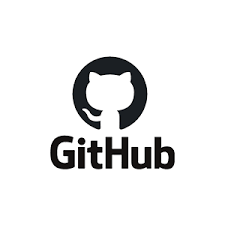

### Importez le fichier CSV dans le DataFrame.

In [21]:
import pandas as pd


df=pd.read_csv('warehouse.csv', sep=';')
df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df

,warehouse_id,location
0,WH-001,California
1,WH-002,Georgia
2,WH-003,New York
3,WH-004,Illinois


### Extration id

In [26]:
df1=pd.read_csv('warehouse.csv', sep=';')
df1.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df1[['prefix','code']] = df1['warehouse_id'].str.split('-',expand=True)
df1

,warehouse_id,location,prefix,code
0,WH-001,California,WH,001
1,WH-002,Georgia,WH,002
2,WH-003,New York,WH,003
3,WH-004,Illinois,WH,004


In [25]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,001
1,002
2,003
3,004


### Étape 3 : Connectez-vous à MySQL en utilisant Python et créez une base de données
Créez un objet de connexion pour vous connecter à MySQL. Le constructeur connect() crée une connexion à MySQL et renvoie un objet MySQLConnection.

In [ ]:
pip install mysql-connector-python

# Creation de la base de données 'compagny_data'


Créer une connexion
Commencez par créer une connexion à la base de données.

Utilisez le nom d'utilisateur et le mot de passe de votre base de données MySQL :
Étape 3 : Connectez-vous à MySQL en utilisant Python et créez une base de données
Créez un objet de connexion pour vous connecter à MySQL. Le constructeur connect() crée une connexion à MySQL et renvoie un objet MySQLConnection.

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='Shiva2370@')#give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE compagny_data")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed")

### Étape 4 : Créer une table et importer les données CSV dans la table MySQL

Nous allons créer une table employee_data sous la base de données des employés et insérer les enregistrements dans MySQL avec le code python ci-dessous.

creer les deux tables, inserer données dans chaque table, creer le trigger

TRIGGER

In [23]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS warehouse;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE warehouse( warehouse_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', location VARCHAR(30))")
    
        print("Table warehouse is created....")
        #loop through the data frame
        cursor.execute("CREATE TABLE warehouse_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.warehouse VALUES (%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.warehouse_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table warehouse is created....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


![Alt text](table_warehouse.png)

## Creation du trigger


In [12]:
#trigger
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute("CREATE TRIGGER tg_warehouse_insert_id BEFORE INSERT ON warehouse FOR EACH ROW BEGIN INSERT INTO warehouse_seq VALUES (NULL); SET NEW.warehouse_id = CONCAT_WS('-','WH', LPAD(LAST_INSERT_ID(), 3, '0')); END")
    
print("Trigger is created....")

You're connected to database:  ('compagny_data',)
Trigger is created....


![Alt text](trigger_warehouse.png)

Étape 5 : Interroger la table
Interrogez la table pour vous assurer que nos données insérées ont été enregistrées correctement.
Verifie si trigger fonctionne en inserant nouvelle valeur
commande INSERT INTO

### Verifie si le trigger fonctionne en inserant nouvelle valeur avec commande INSERT INTO

Before insert

In [33]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    
# Execute query
sql = "SELECT * FROM compagny_data.warehouse"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

('WH-001', 'California')
('WH-002', 'Georgia')
('WH-003', 'New York')
('WH-004', 'Illinois')



![Alt text](Capture%20d%E2%80%99%C3%A9cran%20(104).png)

Insert into

In [7]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Shiva2370@",
  database='compagny_data'
)

mycursor = mydb.cursor()

sql = "INSERT INTO warehouse (location) VALUES ('France')"


mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


Interroger la table pour voir si warehouse_id a bien été incrementé

In [30]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
# Execute query
sql = "SELECT * FROM compagny_data.warehouse"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

You're connected to database:  ('compagny_data',)
('WH-001', 'California')
('WH-002', 'Georgia')
('WH-003', 'New York')
('WH-004', 'Illinois')
('WH-005', 'France')


![Alt text](warehouse1.png)

warehouse_id a été incrementé

## Customer

In [ ]:
import pandas as pd


df=pd.read_csv('customer_faker.csv', sep=';')
#df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df.head()

In [ ]:
df1=pd.read_csv('customer_faker.csv', sep=';')

df1[['prefix','pref','code']] = df1['customer_no'].str.split('-',expand=True)
df1.head()

In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,1248
1,1249
2,1250
3,1251
4,1252
...,...
1760,3008
1761,3009
1762,3010
1763,3011


![Alt text](table_customer.png)

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS customer;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE customer( customer_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', country varchar(255), state VARCHAR(30), firstName varchar(255), lastName varchar(255), address varchar(255), phone VARCHAR(50), email varchar(50),birhtdate DATE)")
    
        print("Table is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.customer VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print('Record inserted....')    
        #loop through the data frame
        cursor.execute("CREATE TABLE customer_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table customer_seq is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.customer_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("Record inserted")
        
except Error as e:
            print("Error while connecting to MySQL", e)


#created:update

You're connected to database:  ('compagny_data',)
Creating table....
Table is created....
Record inserted....
Table customer_seq is created....
Record inserted


## Creation du trigger


![Alt text](trigger_customer.png)

In [ ]:
#trigger
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute("CREATE TRIGGER tg_customer_insert_id BEFORE INSERT ON customer FOR EACH ROW BEGIN INSERT INTO customer_seq VALUES (NULL); SET NEW.customer_id = CONCAT_WS('-','CU', '001',LAST_INSERT_ID()); END")
    
print("Trigger tg_customer_insert_id is created....")



You're connected to database:  ('compagny_data',)
Trigger tg_customer_insert_id is created....


Test incrementation

![Alt text](insert.png)

### L'autoingrementation de customer id fonctionne


![Alt text](customeer_insert.png)

# Product

In [ ]:
import pandas as pd


df=pd.read_csv('products.csv', sep=';')
#df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df

,Product Code,name,Product Name,Size,Unit Price,UOM
0,PR-143-1082,Adidas Shoe,Adidas Shoe Size 38,38,916,Piece
1,PR-143-1083,Adidas Shoe,Adidas Shoe Size 39,39,1001,Piece
2,PR-143-1084,Adidas Shoe,Adidas Shoe Size 40,40,1165,Piece
3,PR-143-1085,Adidas Shoe,Adidas Shoe Size 41,41,1179,Piece
4,PR-143-1086,Ballet Shoe,Ballet Shoe Size 38,38,1094,Piece
...,...,...,...,...,...,...
123,PR-143-1205,High-heeled Shoe,High-heeled Shoe Size 41,41,1055,Piece
124,PR-143-1206,Pointe Shoe,Pointe Shoe Size 38,38,908,Piece
125,PR-143-1207,Pointe Shoe,Pointe Shoe Size 39,39,1071,Piece
126,PR-143-1208,Pointe Shoe,Pointe Shoe Size 40,40,1090,Piece


In [ ]:
df1=pd.read_csv('products.csv', sep=';')

df1[['prefix','pref','code']] = df1['Product Code'].str.split('-',expand=True)
df1.head()

,Product Code,name,Product Name,Size,Unit Price,UOM,prefix,pref,code
0,PR-143-1082,Adidas Shoe,Adidas Shoe Size 38,38,916,Piece,PR,143,1082
1,PR-143-1083,Adidas Shoe,Adidas Shoe Size 39,39,1001,Piece,PR,143,1083
2,PR-143-1084,Adidas Shoe,Adidas Shoe Size 40,40,1165,Piece,PR,143,1084
3,PR-143-1085,Adidas Shoe,Adidas Shoe Size 41,41,1179,Piece,PR,143,1085
4,PR-143-1086,Ballet Shoe,Ballet Shoe Size 38,38,1094,Piece,PR,143,1086


In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,1082
1,1083
2,1084
3,1085
4,1086
...,...
123,1205
124,1206
125,1207
126,1208


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS product;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to creatPRIMARY KEYe
        cursor.execute("CREATE TABLE product( product_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', name varchar(100), product_name VARCHAR(30), size varchar(100), unit_price INT NULL, uom VARCHAR(100))")
    
        print("Table is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.product VALUES (%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        #loop through the data frame
        cursor.execute("CREATE TABLE product_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.product_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table is created....
Table is created....


In [ ]:
#trigger
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute("CREATE TRIGGER tg_product_insert_id BEFORE INSERT ON product FOR EACH ROW BEGIN INSERT INTO product_seq VALUES (NULL); SET NEW.product_id = CONCAT_WS('-','PR', '143',LAST_INSERT_ID()); END")
    
print("Trigger tg_product_insert_id is created....")

# Creation table delivery_cost

In [ ]:
import pandas as pd


df=pd.read_csv('delivery.csv', sep=';')
#df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df

,3PL Code,3PL Name,Delivery Cost
0,3PL-001,DHL,10.45
1,3PL-002,FedEx,13.81
2,3PL-003,ShipBob,8.03
3,3PL-004,Rakuten Logistics,12.28


In [ ]:
df1=pd.read_csv('delivery.csv', sep=';')

df1[['prefix','code']] = df1['3PL Code'].str.split('-',expand=True)
df1.head()

,3PL Code,3PL Name,Delivery Cost,prefix,code
0,3PL-001,DHL,10.45,3PL,001
1,3PL-002,FedEx,13.81,3PL,002
2,3PL-003,ShipBob,8.03,3PL,003
3,3PL-004,Rakuten Logistics,12.28,3PL,004


In [ ]:
df1= pd.DataFrame(df1['code'])
df1

,code
0,001
1,002
2,003
3,004


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS delivery_cost;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to creatPRIMARY KEYe
        cursor.execute("CREATE TABLE delivery_cost(`id` varchar(20) NOT NULL DEFAULT '0',`name` varchar(100) DEFAULT NULL, `cost` float DEFAULT NULL,  PRIMARY KEY (`id`) )")
    
        print("Table delivery_cost is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.delivery_cost VALUES (%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into delivery_cost")
        #loop through the data frame
        cursor.execute('DROP TABLE IF EXISTS delivery_seq;')
        cursor.execute("CREATE TABLE delivery_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.delivery_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into delivery_seq")
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table delivery_cost is created....
data insert into delivery_cost
data insert into delivery_cost
data insert into delivery_cost
data insert into delivery_cost
Table is created....
data insert into delivery_seq


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute("CREATE TRIGGER tg_delivery_insert_id BEFORE INSERT ON delivery_cost FOR EACH ROW BEGIN INSERT INTO delivery_seq VALUES (NULL); SET NEW.id = CONCAT_WS('-','3PL', LPAD(LAST_INSERT_ID(), 3, '0')); END")
    
print("Trigger tg_delivery_insert_id is created....")

You're connected to database:  ('compagny_data',)
Trigger tg_product_insert_id is created....


## Creation table agent 

In [ ]:
import pandas as pd


df=pd.read_csv('agent.csv', sep=';')
#df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df.head()

,Agent Code,Job Grade,Location,Title,Shift
0,AG-001,JG4,Philippines,Manager,Night
1,AG-002,JG4,India,Manager,Morning
2,AG-003,JG4,Malaysia,Manager,Night
3,AG-004,JG4,Indonesia,Manager,Morning
4,AG-005,JG7,Philippines,Analyst,Night


In [ ]:
df1=pd.read_csv('agent.csv', sep=';')

df1[['prefix','code']] = df1['Agent Code'].str.split('-',expand=True)
df1= pd.DataFrame(df1['code'])

df1.head()

,code
0,001
1,002
2,003
3,004
4,005


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS agent;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to creatPRIMARY KEYe
        cursor.execute("CREATE TABLE agent(agent_id VARCHAR(20) NOT NULL PRIMARY KEY DEFAULT '0',job_grade varchar(100) DEFAULT NULL, location varchar(50) DEFAULT NULL, title varchar(100) DEFAULT NULL,shift varchar(100) DEFAULT NULL)")
    
        print("Table delivery_cost is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.agent VALUES (%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into agent")
        #loop through the data frame
        cursor.execute('DROP TABLE IF EXISTS agent_seq;')
        cursor.execute("CREATE TABLE agent_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.agent_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("data insert into agent_seq")
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table delivery_cost is created....
data insert into agent
Table is created....
data insert into agent_seq


### Trigger

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
cursor.execute("CREATE TRIGGER tg_agent_insert_id BEFORE INSERT ON agent FOR EACH ROW BEGIN INSERT INTO agent_seq VALUES (NULL); SET NEW.agent_id = CONCAT_WS('-','AG', LPAD(LAST_INSERT_ID(), 3, '0')); END")
    
print("Trigger tg_agent_insert_id is created....")

You're connected to database:  ('compagny_data',)
Trigger tg_delivery_insert_id is created....


# Table orders

### 1. Importez pandas

In [ ]:
import pandas as pd


df=pd.read_csv('order_faker.csv', sep=';')

#df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)
df.head()

,order_id,order_date,agent_code,processing_date,customer_code,product_code,quantity,selling_price,total_amount,warehouse_code,pl3,delivery_date,customer_satisfaction
0,OR-481-389,2020-02-16,AG-003,2020-02-17,CU-001-1865,PR-143-1167,2,1038,2076,WH-004,3PL-003,2020-02-29,3
1,OR-481-390,2020-09-16,AG-004,2020-09-18,CU-001-1290,PR-143-1153,3,1084,3252,WH-001,3PL-001,2020-10-01,5
2,OR-481-391,2020-11-18,AG-001,2020-11-22,CU-001-2274,PR-143-1178,2,1090,2180,WH-001,3PL-003,2020-12-02,5
3,OR-481-392,2020-05-12,AG-026,2020-05-18,CU-001-2436,PR-143-1102,1,1038,1038,WH-004,3PL-001,2020-05-27,3
4,OR-481-393,2020-07-26,AG-011,2020-07-31,CU-001-2589,PR-143-1168,4,1079,4316,WH-001,3PL-002,2020-08-12,3


In [ ]:
df1=pd.read_csv('order_faker.csv', sep=';')

df1[['prefix','prefix2','code']] = df1['order_id'].str.split('-',expand=True)
df1.head()

,order_id,order_date,agent_code,processing_date,customer_code,product_code,quantity,selling_price,total_amount,warehouse_code,pl3,delivery_date,customer_satisfaction,prefix,pref,code
0,OR-481-389,2020-02-16,AG-003,2020-02-17,CU-001-1865,PR-143-1167,2,1038,2076,WH-004,3PL-003,2020-02-29,3,OR,481,389
1,OR-481-390,2020-09-16,AG-004,2020-09-18,CU-001-1290,PR-143-1153,3,1084,3252,WH-001,3PL-001,2020-10-01,5,OR,481,390
2,OR-481-391,2020-11-18,AG-001,2020-11-22,CU-001-2274,PR-143-1178,2,1090,2180,WH-001,3PL-003,2020-12-02,5,OR,481,391
3,OR-481-392,2020-05-12,AG-026,2020-05-18,CU-001-2436,PR-143-1102,1,1038,1038,WH-004,3PL-001,2020-05-27,3,OR,481,392
4,OR-481-393,2020-07-26,AG-011,2020-07-31,CU-001-2589,PR-143-1168,4,1079,4316,WH-001,3PL-002,2020-08-12,3,OR,481,393


In [ ]:
df1= pd.DataFrame(df1['code'])
df1.head()

,code
0,389
1,390
2,391
3,392
4,393


In [ ]:
#create order_seq


#df.rename(columns={"Code":"code","Warehouse Code": "warehouse_id","Warehouse Location":"location"}, inplace=True)

import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS orders;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE orders( order_id VARCHAR(100) NOT NULL PRIMARY KEY DEFAULT '0', order_date DATETIME NOT NULL, agent_id VARCHAR(20) NOT NULL,processing_date DATETIME NULL,customer_id VARCHAR(255) NOT NULL, product_id VARCHAR(100) NOT NULL, quantity INT NOT NULL, unit_price INT NOT NULL, total_amount INT NOT NULL,  warehouse_id VARCHAR(20) NOT NULL,pl3 VARCHAR(20) NOT NULL, delivery_date DATETIME NULL, customer_satisfaction INT NULL,CONSTRAINT `agent_id` FOREIGN KEY (`agent_id`) REFERENCES `agent` (`agent_id`) ON DELETE CASCADE ON UPDATE CASCADE,CONSTRAINT `customer_id` FOREIGN KEY (`customer_id`) REFERENCES `customer` (`customer_id`) ON DELETE CASCADE ON UPDATE CASCADE,CONSTRAINT `pl3` FOREIGN KEY (`pl3`) REFERENCES `delivery_cost` (`id`),CONSTRAINT `product_id` FOREIGN KEY (`product_id`) REFERENCES `product` (`product_id`),CONSTRAINT `warehouse_id` FOREIGN KEY (`warehouse_id`) REFERENCES `warehouse` (`warehouse_id`))")
    
        print("Table orders is created....")
        for i,row in df.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.orders VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("Record inserted")
        #loop through the data frame
        cursor.execute('DROP TABLE IF EXISTS order_seq;')
        cursor.execute("CREATE TABLE order_seq(id INT NOT NULL AUTO_INCREMENT PRIMARY KEY)")
    
        print("Table order_seq is created....")
        for i,row in df1.iterrows():
            #here %S means string values 
            sql = "INSERT INTO compagny_data.order_seq VALUES (%s)"
            cursor.execute(sql, tuple(row))
            
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
        print("Record inserted")
        

        
        
      
        
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('compagny_data',)
Creating table....
Table orders is created....
Record inserted
Table order_seq is created....
Record inserted


### Creation du trigger BEFORE INSERT <a class="anchor" id="Creation-du-trigger-BEFORE-INSERT"></a>

Creation du trigger BEFORE INSERT

incrémentation automatique avec une chaîne de chiffres et de lettres

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute("CREATE TRIGGER tg_order_insert_id BEFORE INSERT ON orders FOR EACH ROW BEGIN INSERT INTO order_seq VALUES (NULL); SET NEW.order_id = CONCAT_WS('-','OR', '481',LAST_INSERT_ID()); END")
    
    print("Trigger tg_order_insert_id is created....")



You're connected to database:  ('compagny_data',)
Trigger tg_order_insert_id is created....


## modif colonne unit_price 

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute("UPDATE compagny_data.orders INNER JOIN product ON compagny_data.orders.product_id = product.product_id SET compagny_data.orders.unit_price= product.unit_price")
    


You're connected to database:  ('compagny_data',)


### Total amout

![Alt text](Capture%20d%E2%80%99%C3%A9cran%20(103).png)

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
conn = msql.connect(host='localhost', database='compagny_data', user='root', password='Shiva2370@')
if conn.is_connected():
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database: ", record)
    cursor.execute("UPDATE compagny_data.orders INNER JOIN product ON compagny_data.orders.product_id = product.product_id SET total_amount= product.unit_price*compagny_data.orders.quantity")
    
    print("total_amount a été mis à jours")

You're connected to database:  ('compagny_data',)
La colonne total_amount a été mise à jours


In [34]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Shiva2370@",
  database='compagny_data'
)
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('agent',)
('agent_seq',)
('customer',)
('customer_seq',)
('delivery_cost',)
('delivery_seq',)
('order_seq',)
('orders',)
('product',)
('product_seq',)
('timestamps',)
('warehouse',)
('warehouse_seq',)


In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Shiva2370@",
  database='compagny_data'
)
mycursor = mydb.cursor()

mycursor.execute("DROP TRIGGER compagny_data.tg_customer_insert_id")

print("Trigger deleted")

